## I analyzed the data and managed to extract a meaningful insight for this e-commerce store.

### Check out the insights at the bottom of this notebook :)

## Importing Libraries and Dataset

In [9]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
df = pd.read_csv("C:\\Users\\T-Gamer\\Desktop\\analise_dados\\ecommerce_customer_behavior_dataset.csv")

## Analyzing the data

In [10]:
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [11]:
### Checking null and data type

print(f'> Checking Null values and Data Types <'), print(f'-' * 60), df.info()
print('\n')
print(f'> Checking Null again <'), print(f'-' * 30), df.isnull().sum()


> Checking Null values and Data Types <
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type      

(None,
 None,
 Order_ID                    0
 Customer_ID                 0
 Date                        0
 Age                         0
 Gender                      0
 City                        0
 Product_Category            0
 Unit_Price                  0
 Quantity                    0
 Discount_Amount             0
 Total_Amount                0
 Payment_Method              0
 Device_Type                 0
 Session_Duration_Minutes    0
 Pages_Viewed                0
 Is_Returning_Customer       0
 Delivery_Time_Days          0
 Customer_Rating             0
 dtype: int64)

In [12]:
## Checking the general statistics 

df.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


# 1. What product contributes the most for the anual revenue?

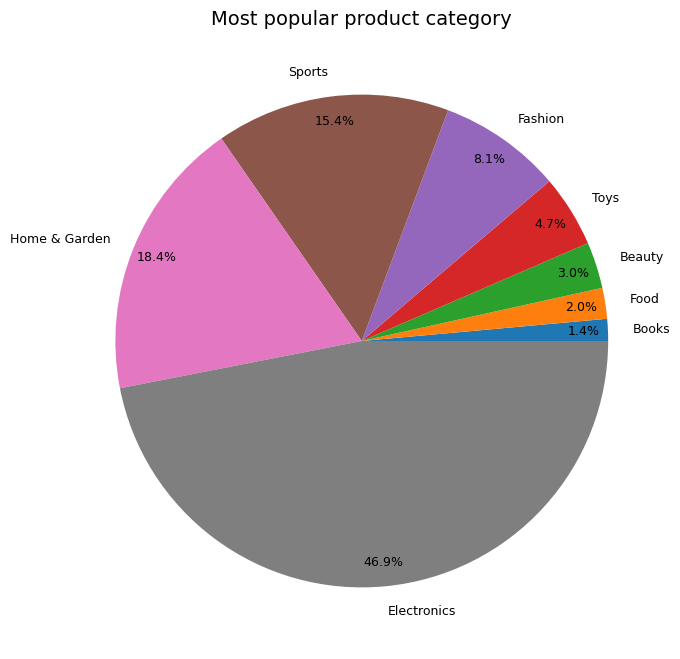

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') #Assure that 'Date' camp is a date
df_filter_1year = df.loc[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2024-01-01')] 
df_values = df_filter_1year.groupby('Product_Category')['Total_Amount'].sum().sort_values()

plt.figure(figsize=(8, 8))
plt.pie(x = df_values, labels = df_values.index, textprops = {'fontsize':9}, autopct = '%1.1f%%', pctdistance=0.9)
plt.title('Most popular product category', size= 14)
plt.show()

## 2. Sales during the year

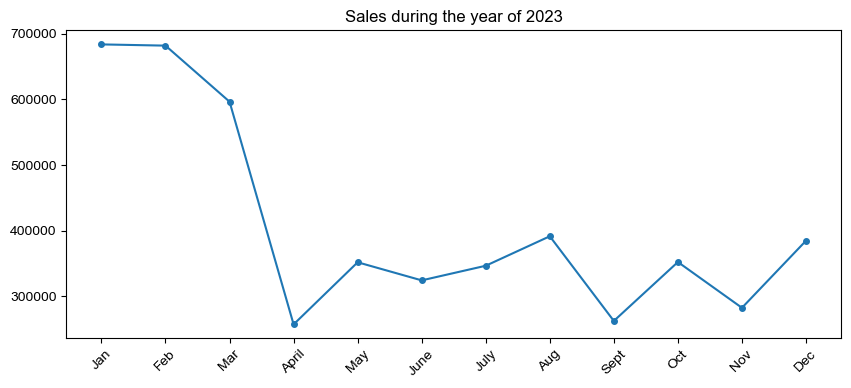

In [14]:
grouping_months = df['Date'].dt.month #That returns the same index with 5000 rows, but separeted by dates
sales_month = df.groupby(grouping_months)['Total_Amount'].sum() #grouping and summing the total_amount sold in that month
#Above: It works because the "grouping_months" returns a big list, but is grouped by 'df.groupby'

plt.figure(figsize=(10,4))

plt.plot(sales_month.index, sales_month, marker='o', markevery=1, markersize=4) #Using line graphs to describe better the progression
sns.set_style('whitegrid')

plt.title(f"Sales during the year of 2023") #

# plt.yticks(sales_month, [(f'{i:,.2f}') for i in sales_month]) ### FAILED. I tried to format the numbers, but they overlapped

plt.xticks(sales_month.index, ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']) 

#Above: Replacing the argument X (which is an int between 1-12) by a List with the names of the months for better visualization

plt.xticks(rotation=45)
plt.show()



### There's a big increase in sales in the first two months...

## 3. What is the most sold category in those two months?

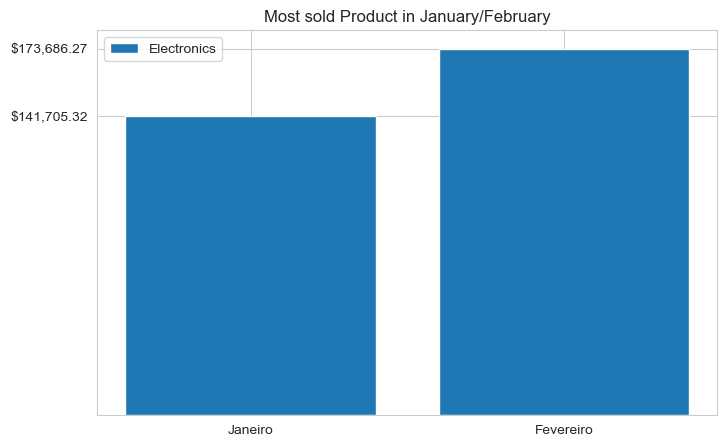

In [15]:
sns.set_style('whitegrid')

filtro_mes = df['Date'].loc[((df['Date'].dt.month == 1) & (df['Date'].dt.year == 2023)) | \
((df['Date'].dt.month == 2) & (df['Date'].dt.year == 2023))]
#ABOVE:

most_sold_jan_fev = df.groupby([filtro_mes.dt.month,'Product_Category'])['Total_Amount'].sum().nlargest(2).sort_values()
most_sold_jan_fev = most_sold_jan_fev.reset_index()
#ABOVE: 

#COSMETICS:
plt.figure(figsize=(8,5))
plt.bar(most_sold_jan_fev['Date'], most_sold_jan_fev['Total_Amount'], label='Electronics')
plt.title('Most sold Product in January/February')
plt.xticks(most_sold_jan_fev['Date'], ['Janeiro','Fevereiro'])

plt.yticks(
    most_sold_jan_fev['Total_Amount'],                               
    [f"${i:,.2f}" for i in most_sold_jan_fev['Total_Amount']] #LIST COMPREHENSION to format the numbers        
)

plt.legend() #TO EXHIBIT the legend "Electronics" 
plt.show()




### Electronics outperformed other products, but this big volume are maintained during the year?

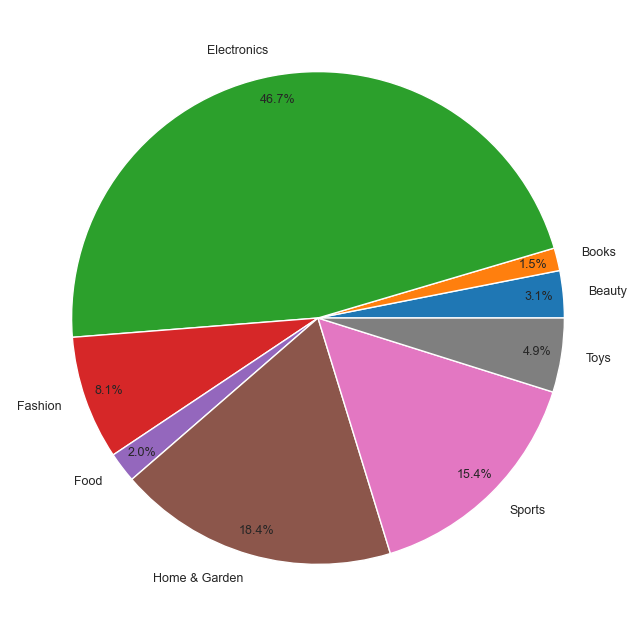

In [16]:
#Let's remove the first two months of the year and check the volume of sales in Electronics compared to other products
#Does it still outperform other product categories?

#df['Date'].info() #Checking if date is in the correct format

df['Month'] = df['Date'].dt.month #Extract month from the date column

filtering_months = df.loc[((df['Month'] >=3) & (df['Month'] <=12))] #Filtering months withour jan/fev to compare

#filtering_months['Month'].unique() #Checking if the filter works

filtering_months = filtering_months.groupby('Product_Category')['Total_Amount'].sum() 

plt.figure(figsize=(8,8))
plt.pie(filtering_months, labels=filtering_months.index, textprops={'fontsize':9}, autopct= '%1.1f%%', pctdistance=0.9)
plt.show()

### Even after filtering the outliers (jan/fev) Electronics performs way above the other products

## More explorations

In [17]:
## In case that a website is badly designed for mobile devices, maybe this data can contribute for noticing that

print(f'The device type affects the overall experience of the user?')
print(f'-'*60)
print(f'Days/Rating')


df.loc[:10, ['Device_Type', 'Customer_Rating']] 
device_vs_d_time = df.groupby('Device_Type')['Customer_Rating'].mean()

pd.Series([(f' {i:,.2f}') for i in device_vs_d_time], device_vs_d_time.index) #Formatting the float number

The device type affects the overall experience of the user?
------------------------------------------------------------
Days/Rating


Device_Type
Desktop     3.91
Mobile      3.90
Tablet      3.88
dtype: object

In [18]:
print(f'\nThe delivery time affects the overall experience of the user?')
print(f'-' * 60)
print(f'Days/Rating')

delivery_time_filter = df.loc[(df['Delivery_Time_Days'].isin([1,2,3,4,5,6,7,8]))]
rating_vs_d_time = df.groupby(delivery_time_filter['Delivery_Time_Days'])['Customer_Rating'].mean()
pd.Series([(f' {i:,.2f}') for i in rating_vs_d_time], index=[1,2,3,4,5,6,7,8])#Formatting the float number
#Above: Filtering 1-8 days to check if the rating increase between people who received the package first




The delivery time affects the overall experience of the user?
------------------------------------------------------------
Days/Rating


1     3.63
2     3.86
3     4.04
4     3.91
5     3.89
6     3.86
7     3.89
8     3.95
dtype: object

## Insights

#### There was a dramatic increase in sales during the first two months of the year. I would conduct further investigation into this to understand what happened so the company can potentially replicate it. (Was it a marketing campaign, for example?)

#### Electronics are by far the most popular product category among customers (46.9%), followed by Home & Garden (14.8%). This led me to question whether this strong performance was driven by the surge at the beginning of the year or whether Electronics consistently perform well throughout the year.

#### Electronics outperform all other categories even when the first two months are excluded. Based on this, I would suggest evaluating the cost of maintaining the other product categories and potentially specializing the store in Electronics. Books, for instance, accounted for only 1.4% of total revenue in 2023.